# The Lending Club: Finding an Optimal Investment Portfolio

<div style="line-height: 1.6;">
IFTE0002 Coursework, Group F

Iman Zafar, Rickey Chen, Ariq Zidane, Aadhira Chavan, Gabriella Larissa, Owen Babbington-Ellis, Kane Basu
</div>

<div style="line-height: 1.6;">
sample
</div>

## 1. Introduction

In [ ]:
# kane

To include:
- what is the lending club (peer-to-peer lending platform)
- aim of the project (2 investment strategies, comparison across strategies and comparison with a random strategy)
- dataset being used
- outline of remaining notebook (i.e., what the remaining sections will include)

## 2. Data Exploration

<div style="line-height: 1.6;">
The lending club dataset provides loan-level data about loan agreements that took place on the platform. The data includes information about the borrower's profile, the loan's terms, and the performance of the loan. As part of our data exploration, we dive into each of the features provided in the dataset to better understand the properties of the features and how they interact with each other.
</div>
<br>
<div style="line-height: 1.6;">
A general examination of the completeness of the dataset revealed that only the 'emp_length' column had missing values, with 6.4% of the values being null. As this is not a significant proportion, we don't expect this to impact model training.
</div>
<br>
<div style="line-height: 1.6;">
As the aim of our project is creating optimal investment strategies based on loan return and default, we begin by examining the distributions of our target variables. We use the 'loan_status' feature for the strategy based on default and 'ret_INTa' for the strategy based on return. The feature used for return here is treated as a proxy for the purpose of data exploration, and a custom definition of return is defined at a later stage.
</div>

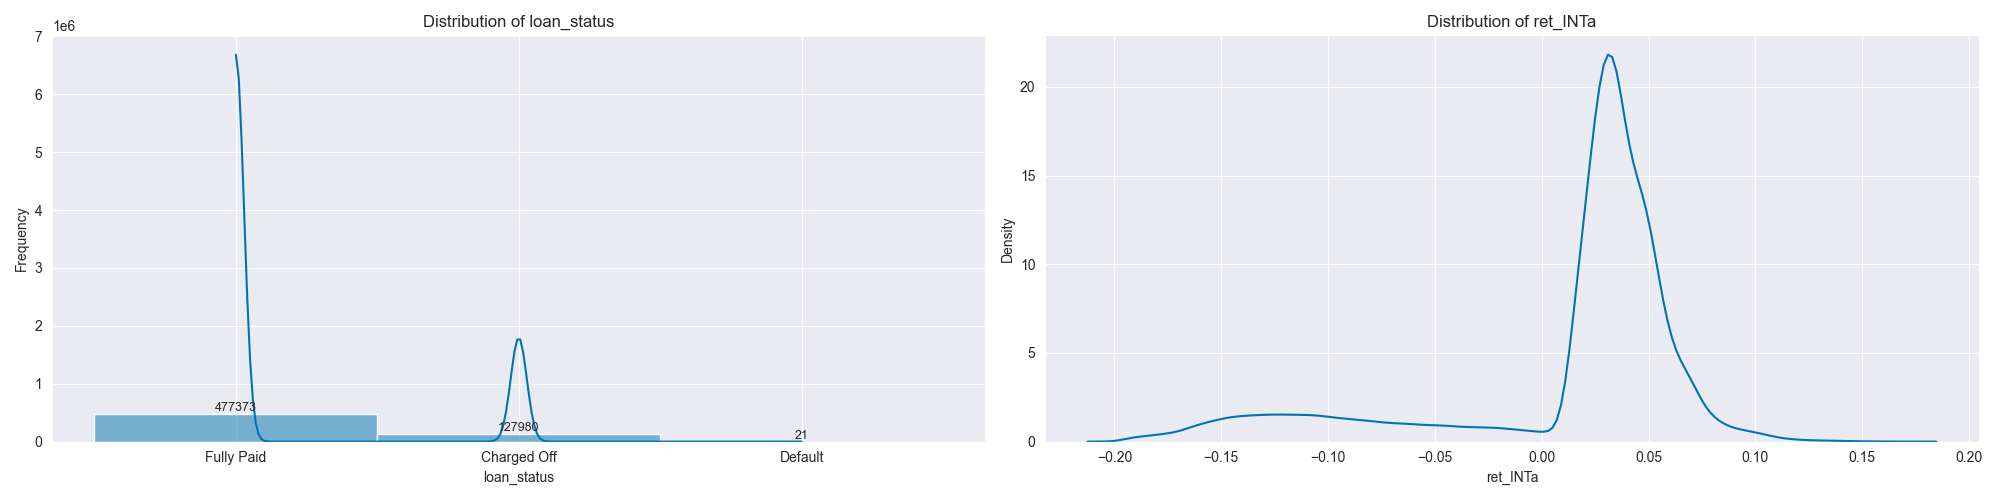

In [ ]:
display(figure_1_1)

<div style="line-height: 1.6;">
As seen in the plot above, the 'loan_status' feature has significant class imbalance. Since we are looking to predict default, which has a count of only 21 among the 605374 loans, predicting with this feature may lead to poor model performance. This is because the model will not have enough instances of default to learn from and may only learn to predict the majority class. In order to improve this issue, we create our target feature to consider both 'Default' and 'Charged Off' as instances of default. We expect this to have no impact conceptually since a loan is written off as 'Charged Off' when it has become unlikely for the loan to be recovered, indicating a failure to repay.
</div>
<br>
<div style="line-height: 1.6;">
The distribution of return provides some positive implications as most regression models assume 'normally distributed' errors. A gaussian-like (roughly bell-shaped, as above) distribution is also useful as there's a lower chance of having issues of heteroskedasticity (changing variance across the ranges of predictions).
</div>

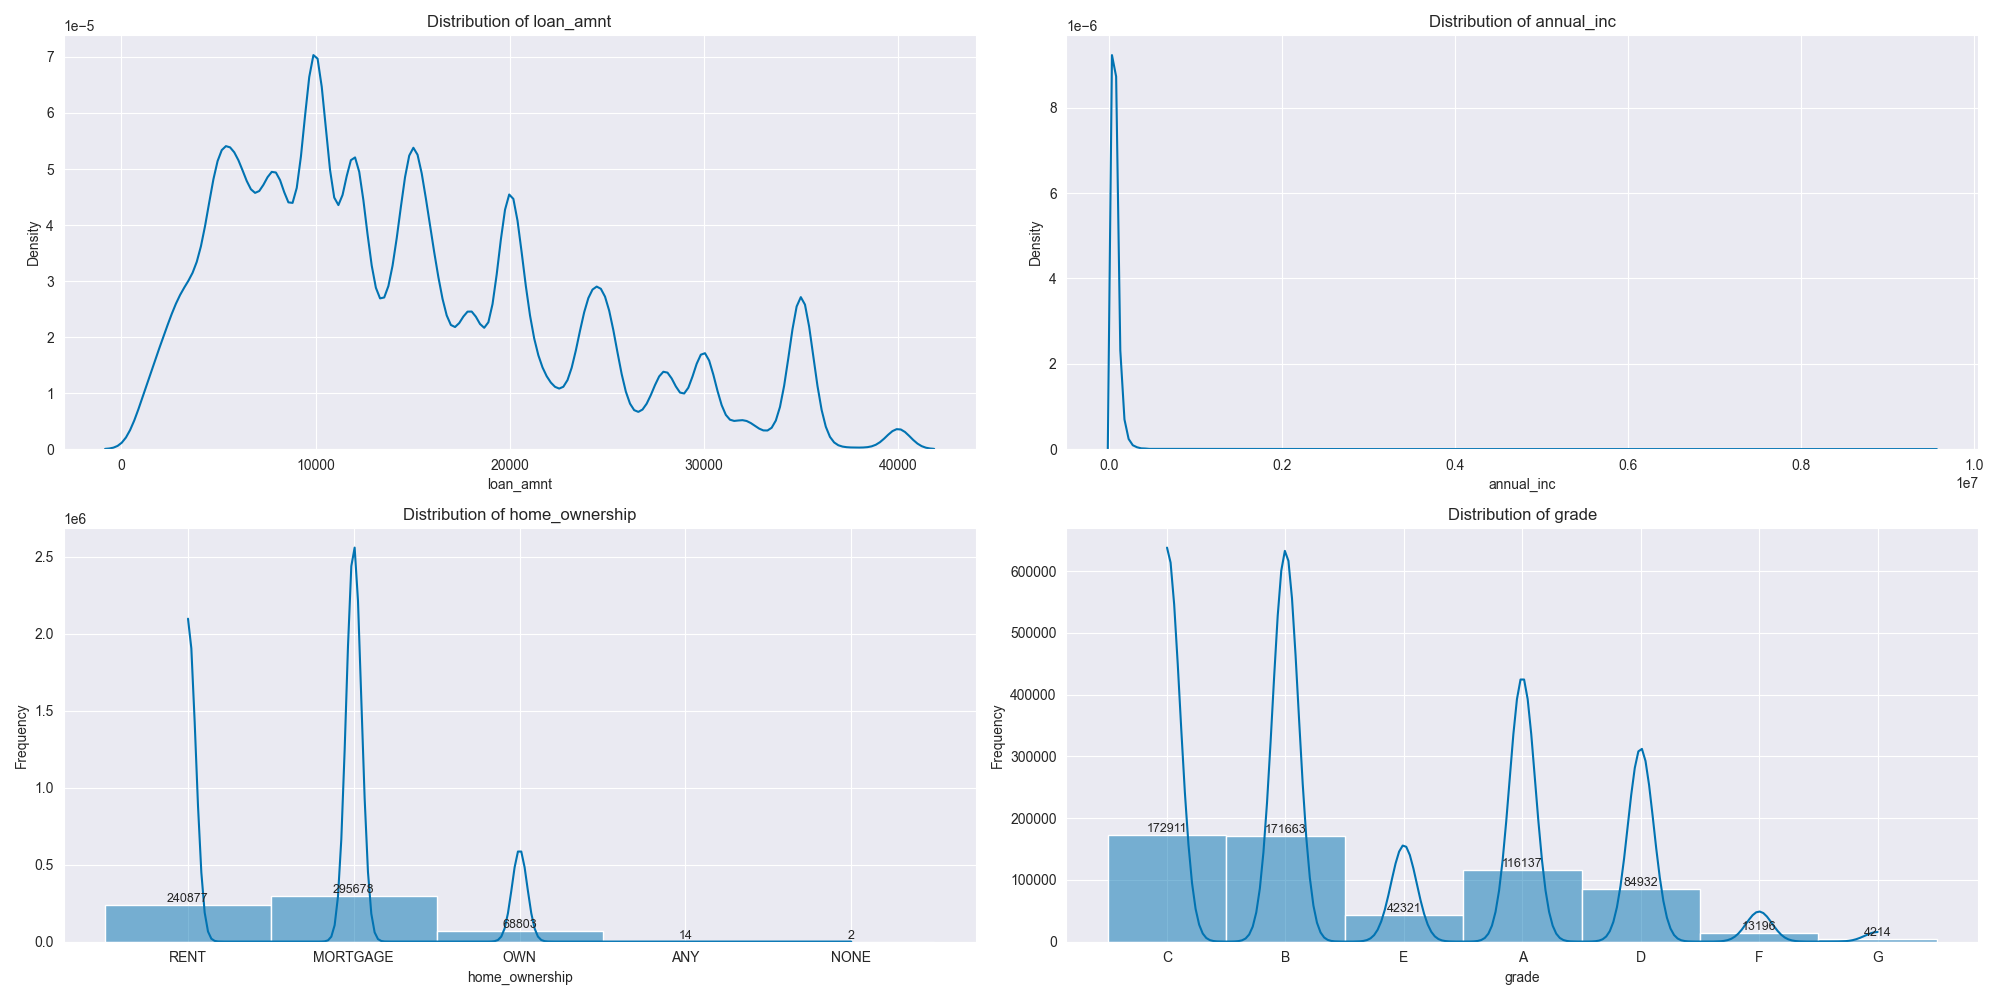

In [ ]:
display(figure_1_2)

<div style="line-height: 1.6;">
Looking at the above distributions of some of the explanatory features, we see that 'loan_amnt' shows a multi-modal distribution, meaning it has more than one peak, specficially around 10k, 15k, 20k etc, which tend to be typical loan values. 'annual_inc' has an extreme right-skewed distribution, also aligned with expectations of incomes across a representative dataset. Carrying on from behaviour expected from majority low or medium-income individuals, we see higher occurrences of renting and mortgages and a low occurence of ownership. 'grade' sees majority instances across grades A - C, showing fewer instances of low-grade loans.
</div>
<br>
<div style="line-height: 1.6;">
Before building our models, we also examine the relationship between some of our key features to ensure conceptual soundness and analyse what we may expect of feature importances.
</div>

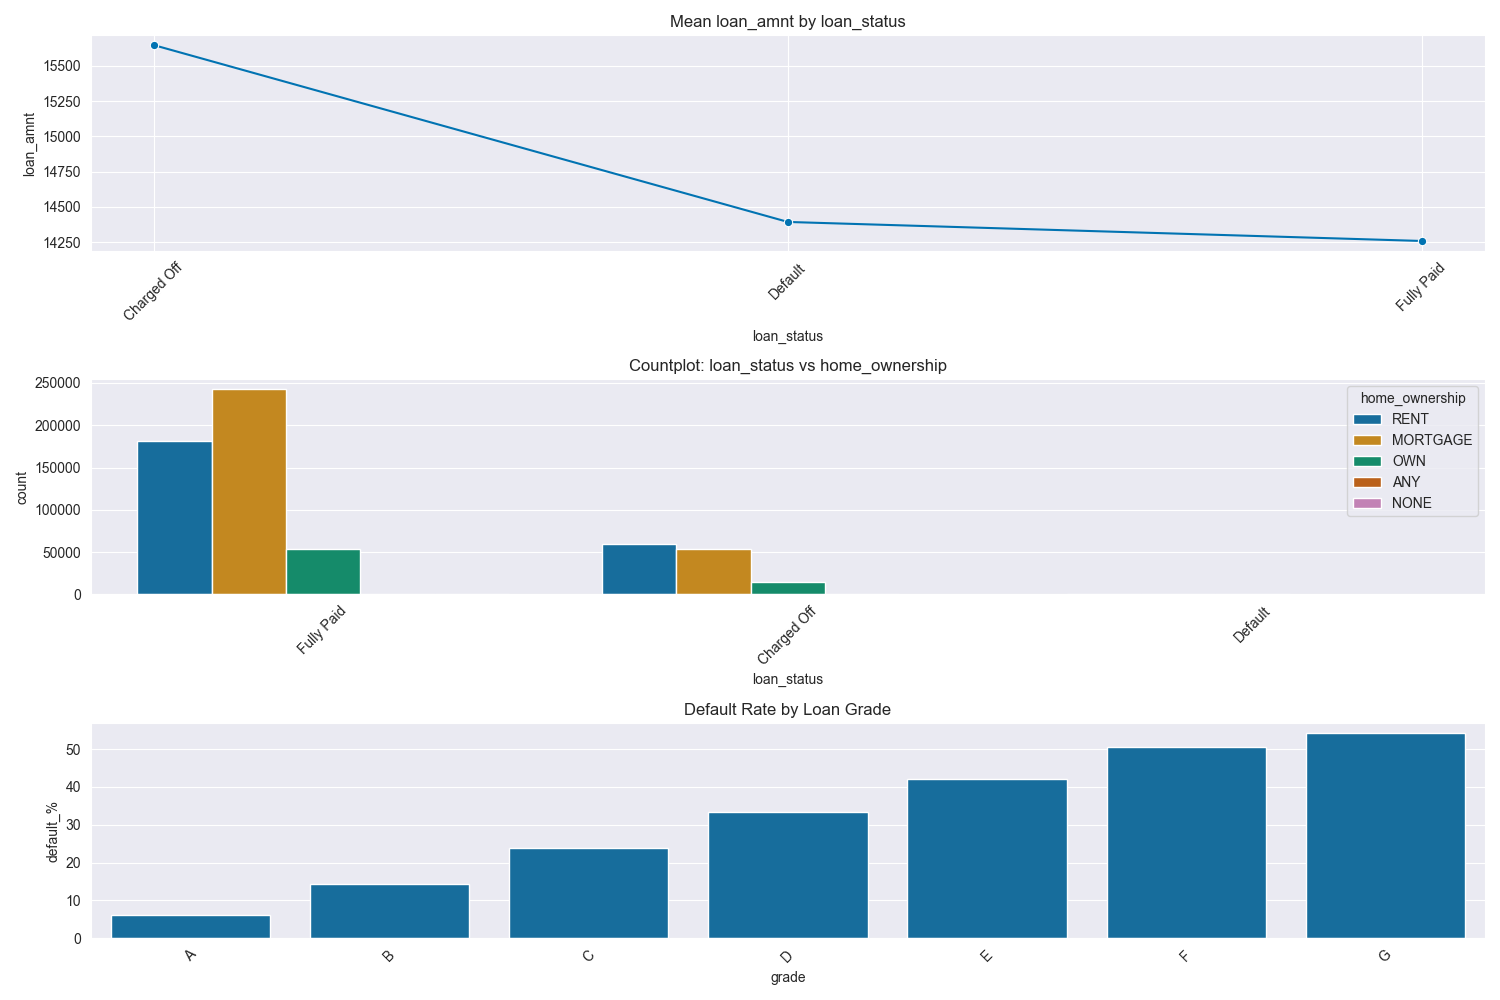

In [ ]:
display(figure_1_3)

<div style="line-height: 1.6;">
As expected, a lower loan amount show more occurences of full payment, with loans issues at high amounts being mostly charged off. We also see that loans that were fully paid had a greater proportion of mortgage holders than those that were charged off. In the last plot, we see that loans with a better grade had a lower percentage of default. All these findings are in line with our expectations of general customer behaviour.
</div>

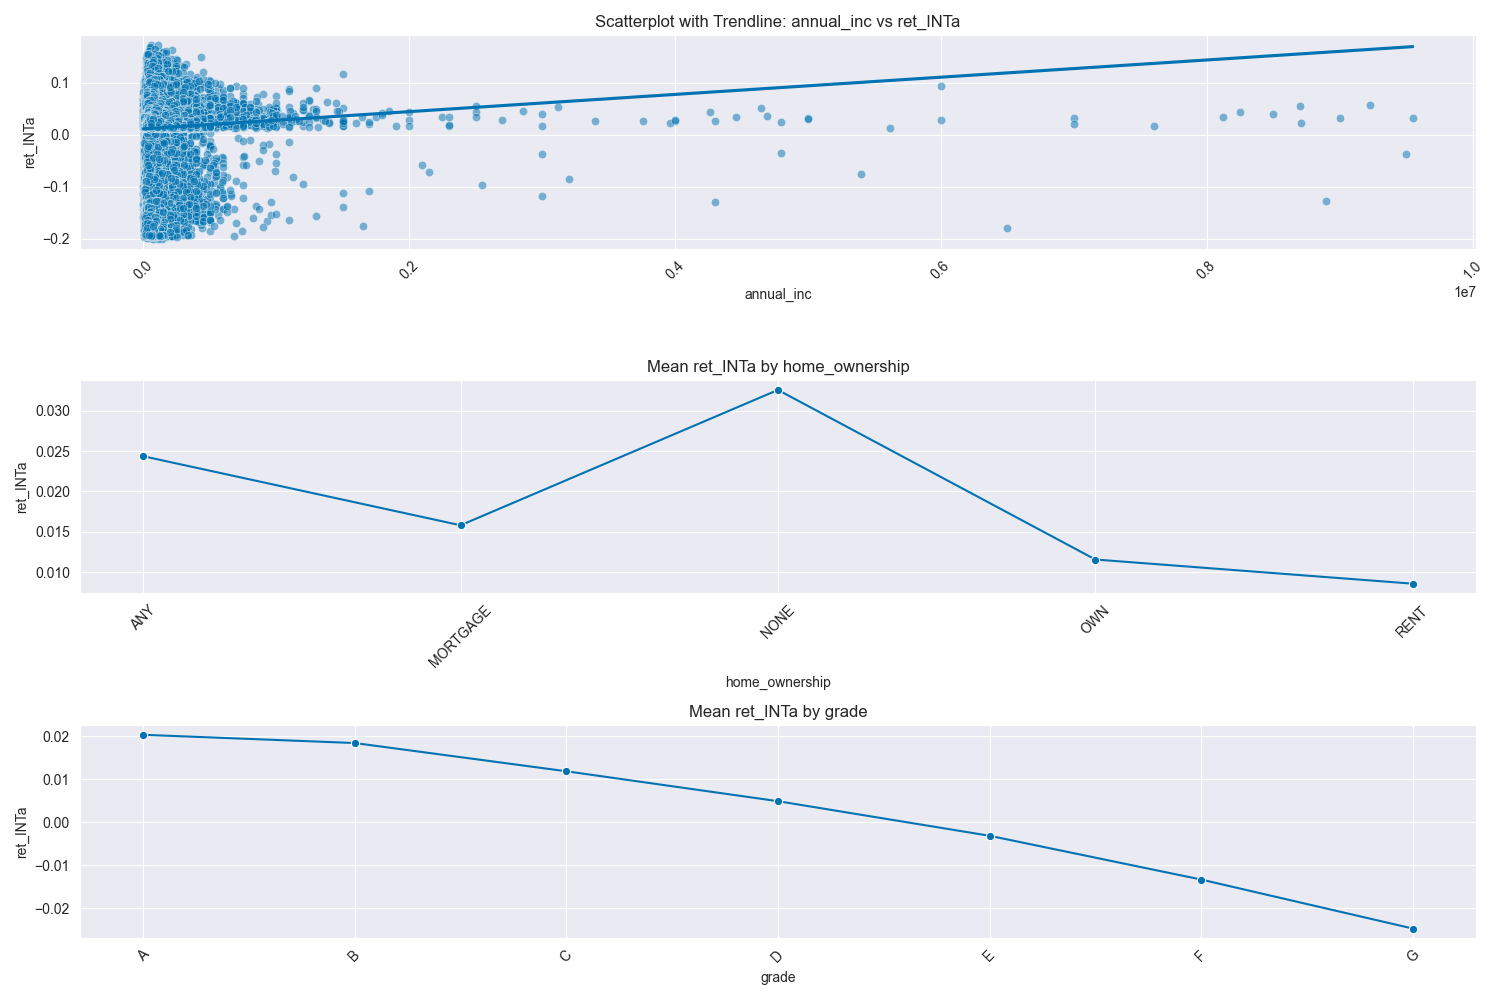

In [ ]:
display(figure_1_4)

<div style="line-height: 1.6;">
Annual income and grade interact with return as expected, we see a higher return as income rises and lower return as grade decreases. We don't see a clear relationship between home ownership and return, although mortgage holders seeing greater return than those that are renting can be justified conceptually.
</div>
<br>
<div style="line-height: 1.6;">
Finally, we plot correlations across all features to identify any features that may cause leakage or features that may be redundant (i.e., high correlation with another feature would mean only one of those features would be useful to the model).
</div>

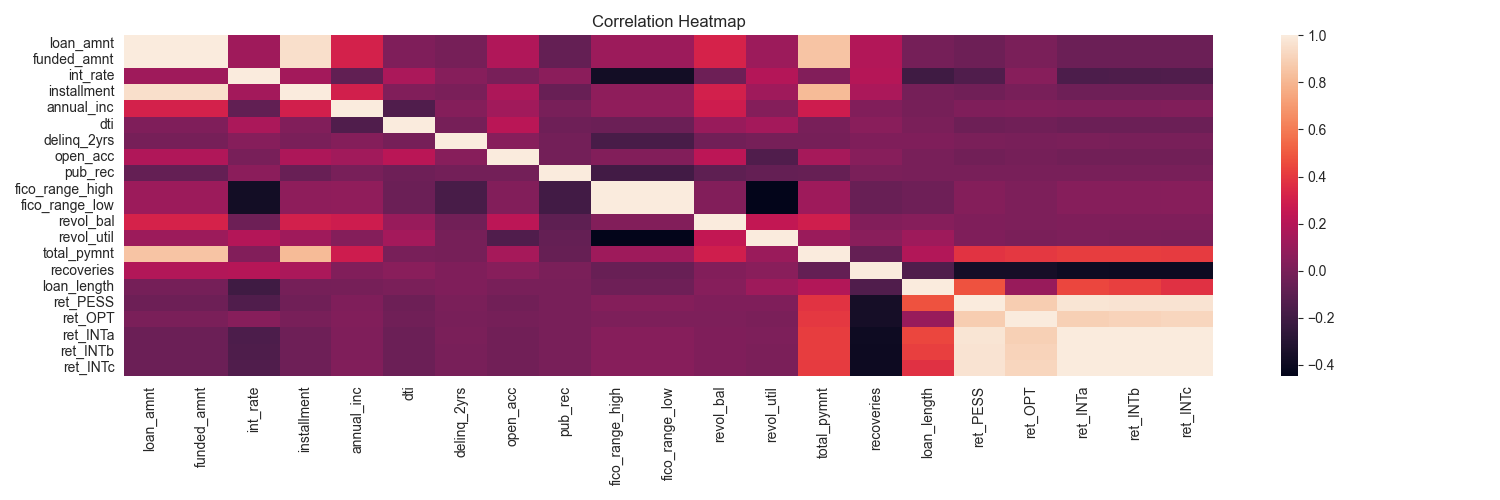

In [ ]:
display(figure_1_5)

<div style="line-height: 1.6;">
The heatmap above shows us correlations between the continuous variables in the dataset. After using the above and anaysing the conceptual definitions of all the features in the dataset, we identified the below as features that may cause data leakage or were redundant and will need to be removed prior to modelling.
<br><br>
<div style="padding-left: 20px;">
<ol>
    <li>'id': does not provide the model with any useful information.</li>
    <li>'issue_d', 'last_pymnt_d', 'earliest_cr_line' (date columns): as these would classify as categorical columns, the high cardinality of these features would reduce their usefulness. Instead of using these features as is, we compute a feature called to represent the length of the customer's credit history in either months or years.</li>
    <li>'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc' (return columns): As these were likely computed after the loan had reached maturity or had defaulted, they classify as 'leaky' feaures.</li>
    <li>'total_pymnt', 'recoveries': Both features are also only available after loan has matured and will cause data leakage.</li>
    <li>'term', 'funded_amnt': These are both redundant features. They are highly correlated with 'term_num' and 'loan_amnt' respectively and therefore add no usefu information to the model.</li>
    <li>'fico_range_low', 'fico_range_high': As visible in the heatmap, these features are also highly correlated. At least one of these features was removed before model training.</li>
</ol>
    </div>
</div>

## 3. Benchmark: Random Allocation

<div style="line-height: 1.6;">
Before we begin modelling, we define a benchmark to evaluate the investment strategies against. In order to do this, we define a strategy using a random allocation of N number of loans. To calculate return for the benchmark, we use the definition of return defined in section ??. This definition of return is used for portfolio evaluation for all strategies defined in this report in order to allow for comparability between the strategies.
<br><br>
The returns from a random portfolio are as follows:
<br><br>
</div>

<div style="padding-left: 20px;">

| Portfolio Size | Mean Return | Std Dev |
|:--------------:|:-----------:|:-------:|
| 1000 | 2.77% | 0.0089 |
| 500 | 2.57% | 0.0114 |
| 300 | 2.67% | 0.0151 |

</div>

## 4. Investment Strategy 1: Maximising Return

###  4.1 Model 1

- definition of return & explain
- what model you chose
- why you chose it
- any pre-processing done
- which hyperparameters you tuned
- how you chose your model and hyperparameters

### 4.2 Model 2 - Artifical Neural Network

<div style="line-height: 1.6;">

Artificial Neural Networks (ANNs) are brain-inspired computational models made up of interconnected “neurons” that process inputs and generate outputs (Katal & Singh, 2021). Introduced formally by McCulloch and Pitts in 1943, ANNs use weighted connections between layers to mathematically transform inputs into outputs (Zakaria, Al-Shebany & Sarhan, 2014). Widely applied across disciplines, ANNs are particularly effective in finance and economics for forecasting and optimizing returns. Atsalakis and Valavanis (2009) found ANNs outperform traditional methods in predicting stock returns, while Berg et al. (2020) showed that machine learning models, including ANNs, enhance credit risk assessment and support improved lending returns.

**Definition of Return**

The return is defined as the annualized yield on each loan, calculated by comparing total borrower repayments, including post-default recoveries, to the original loan amount. Calculating return in a logarithmic form smooths extreme values and makes the target distribution closer to normal. This metric, constructed as custom_return, serves as the target variable in the ANN model and aligns with the goal of maximizing investment returns. It offers a realistic, continuous, and investor-focused measure of loan performance, making it well-suited for modeling Lending Club data. Unlike default classifications or credit grades, it reflects the actual financial outcome for lenders in annualized terms, directly supporting the model’s objective to identify and recommend highly profitable loans.

What makes this return metric especially powerful is its basis in real borrower behavior. It incorporates the total amount repaid by the borrower, along with any recoveries obtained after default, rather than relying on binary assumptions of full repayment or complete loss. As a result, the ANN learns from a wide range of repayment outcomes, from fully performing loans to partially recovered defaults. This granular information enables more accurate predictions and better-informed investment decisions.

Moreover, annualizing the return ensures that loans of different term lengths are directly comparable. This standardization allows the ANN to uncover consistent and generalizable patterns in loan performance, regardless of duration. Additionally, recoveries are incorporated to account for funds recouped after defaults, providing a more accurate reflection of the lender’s real-world financial experience. Together, these characteristics make custom_return a highly effective and meaningful target for training an ANN model aimed at return maximization.

**Input Variables**

To select the most relevant features for modeling, the f_regression method is used to measure the correlation between each feature and the target variable, ranking them based on an F-statistic to retain the top 30. This process filters out irrelevant or weakly correlated inputs, improving the model’s ability to generalize to unseen data and reduce overfitting, while ensuring that only features with demonstrated predictive value for returns are included. The following input variables were used in the model, each showing a measured correlation with return.

</div>

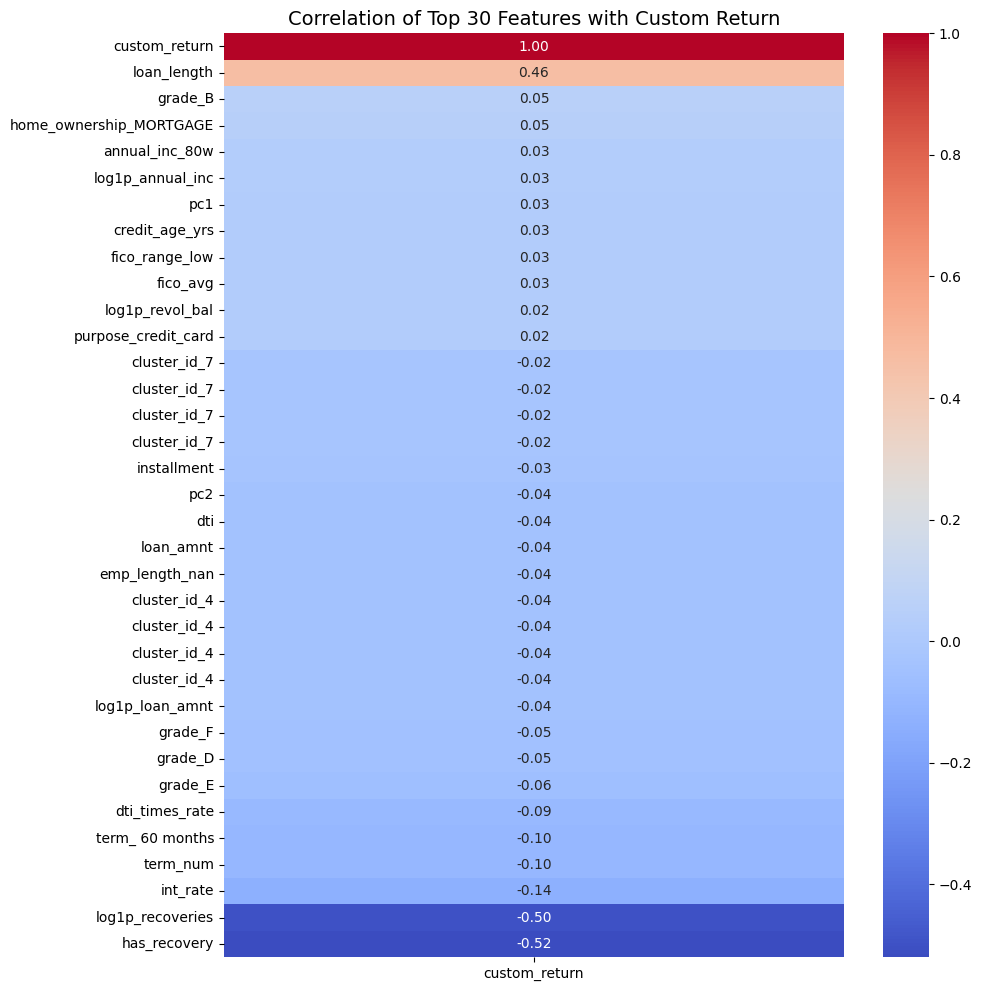

In [18]:
display(figure_3_1)

<div style="line-height: 1.6;">

**Methodology**

To prepare the data for ANN modeling, highly skewed numerical features were log-transformed, and moderately skewed ones were square-root transformed to normalize distributions while preserving rank order. A new feature, credit_age_yrs was created to capture borrower credit age from issue_d and earliest_cr_line. Categorical variables were also one-hot encoded for combability with the network. Financial ratios such as loan_to_inc and payment_to_inc were engineered to enhance metric accuracy. Finally, feature scaling was applied to ensure all numeric inputs were on a comparable scale, critical for ANN stability and unbiased learning. The target variable is then binarized where any return >0 becomes 1 (profitable), else 0 (not profitable). The dataset was then split into 80% training and 20% testing sets to separate learning from evaluation, with a random seed of 42 used to ensure model reproducibility.

To improve the model’s performance, hyperparameter tuning was conducted. Rather than manually selecting key parameters such as number of neurons, batch size, or network depth, the tuning process was automated using Keras Tuner. Specifically, a Random Search approach was implemented to explore different configurations efficiently. The tuner tested various neuron counts between 10 and 100 in steps of 10, each using the ReLu activation function, which helps the model to lean complex, non-linear relationships in the data.

The hyperparameter search was carried out across 10 random trials, with each configuration trained twice for stability. During tuning, 10% of the training data was held out for validation, and models were trained for 20 epochs using a batch size of 64. The configuration that resulted in the lowest validation mean squared error was selected as the best-performing model. This optimal ANN model was then used to predict returns on the data.

</div>

## 5. Investment Strategy 2: Minimising Default

###  5.1 Model 1



end of this section - explain exactly which model you decided on.

### 5.2 Model 2 - Artificial Neural Network

<div style="line-height: 1.6;">
For our second model, we consider an Artificial Neural Network (ANN) with a binary target variable. As described in section 3.2, ANNs are powerful computational models that use interconnected 'neurons' to mimic the structure and function of a human brain. These models have found success across multiple industries, with applications in areas like lending and portfolio optimisation within finance.
<br><br>
There's four main components to an ANN:

1. Nodes: single computational unit within a layer. The number of nodes within a layer can vary.
1. Input layer: processes the input data and passes it on to the first hidden layer.
2. Hidden layer: processes the data it receives and passes it on to the next hidden layer. ANNs can have a large number of hidden layers, but for the sake of simplicity and ease of implementation, we limit our model to one hidden layer.
3. Output layer: the final layer of the ANN. The number of nodes within the output layer depends on the type of model. A multi-class classification model would have nodes corresponding to the number of classes, while a binary classifier will have only one.

<br>

**Data Pre-processing**

A number of pre-processing steps were undertaken before we began modelling. To start with, we create our target variable using the 'loan_status' column. Our target is defined as taking the value of 1 if a loan held a 'Default' or 'Charged Off' status, and 0 if it hold a 'Fully Paid' status. As discussed in section 2, we consider 'Charged Off' as default in order to reduce the class imbalance, and expect no conceptual issues to arise from this. Additionally, we deal with our date columns, namely 'issue_d', 'last_pymnt_d', 'earliest_cr_line', by creating a numeric column called 'credit_history_months' to depict the length of the borrower's credit history.
<br><br>
We then drop any columns that could cause feature leakage, details of which were also discussed in section 2. To summarise, the following features were dropped: 'loan_status', 'id', 'issue_d', 'last_pymnt_d', 'earliest_cr_line', 'term', 'funded_amnt', 'fico_range_low', 'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc', 'total_pymnt', 'recoveries'. Categorical columns were then transformed using one-hot encoding, and the data was standardised using scikit-learn's standard scaler to avoid the implicit weighting of columns due to varying scales.
<br><br>
Finally, we split our dataset into training and test sets, with 10% of the dataset retained as a test set. We limit the test set to 10% since 20% of the training dataset will be used for validation while tuning hyperparameters and we aim to provide the model with as much data as possible for training.

<br>

**Hyperparameter Tuning**

There's a number of parameters that can typically be tuned when training an ANN. These may include the number of hidden layers, the number of units within each layer, and the learning rate. However, since we are training a model with only one hidden layer, we consider only the number of units within the hidden layer and the learning rate for this model. A range of 1 - 100 was considered for the number of units, while the learning rate was controlled using the ReduceLROnPlateau callback. We use a callback instead of tuning for the learning rate to avoid overfitting due to extensive tuning and for efficiency in model development. A dynamic learning rate also offers better adaptation to the model's needs. In addition to ReduceLROnPlateau, we also use the EarlyStopping callback to avoid overfitting the model when the model stops seeing improvement.

<br>

**Model Training**

We use the keras tuner to do a parameter search and identify the best value for the number of units in the hidden layer. A reLU (Rectified Linear Unit) activation function is used for the hidden layer, and a sigmoid activation function is used for the output layer in order to force values between 0 and 1. The validation set was set to 20% and 10 epochs were used for each trial, with 15 trials in total. Additionally, 'val_auc' was used as the 'objective', since the AUC evaluates the models ability to distinguish between the two classes. Since we have an imbalanced dataset, we also pass class weights to the tuner to use in model training. This ensures that the model pays attention to the minority class, which is especially important in this case since 'default' is the minority class.

<br>

**Model Evaluation**

We evaluate our model using key metrics like accuracy, precision, recall, and AUC. In this case, we aim to have a higher recall since our priority is to catch as many default cases as possible. This does typically lead to a lower precision, but was decided to be acceptable in this scenario since we are building a risk-averse portfolio and have a lower threshold for false negatives.
<br><br>
As part of model evaluation, we also analyse feature importances to ensure conceptual soundness in our model. Additionally, we tune the model threshold to achieve our desired threshold for recall.

<br>

**Portfolio Construction**

In order to construct our final portfolio, we predict the probability of default on our test set using our trained model. Before selecting loans for our portfolio, we drop all loans that don't meet our chosen threshold for probability of default. We then select the top N loans with the lowest probability of default from the remaining loans, where N is the number of loans we want in our portfolio.

</div>

## 6. Experiments & Results - 800 words

### 6.1 Strategy 1 (Maximising Return) Results

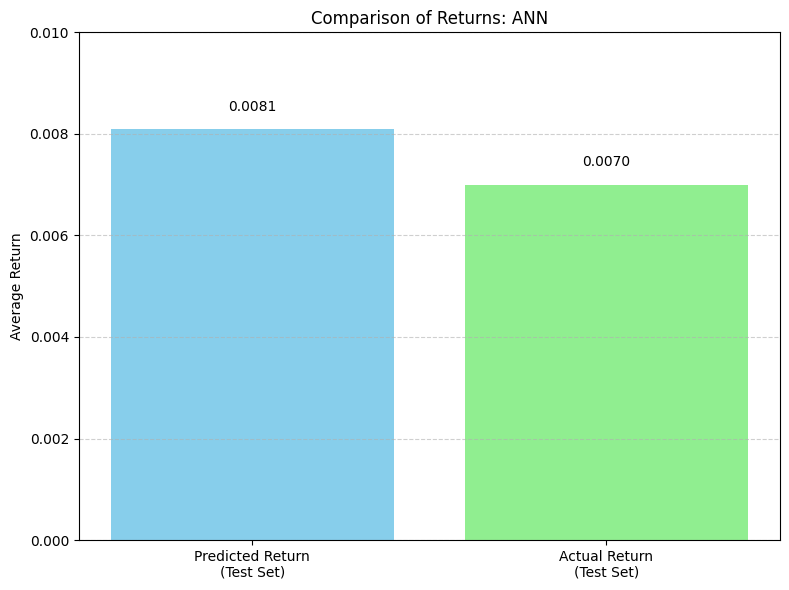

In [26]:
display(figure_6_1)

The ANN model achieved a predicted return of 0.0081 on the test set, slightly overestimating the actual return, but still showing close alignment. With a directional accuracy of 80.72%, the model appears well-calibrated and reliable in identifying return trends. Compared to a random strategy, which yielded a marginally lower average return of 0.0069, the ANN approach still outperforms in terms of profitability – demonstrating its ability to make more informed investment predictions, even if the absolute difference is modest.

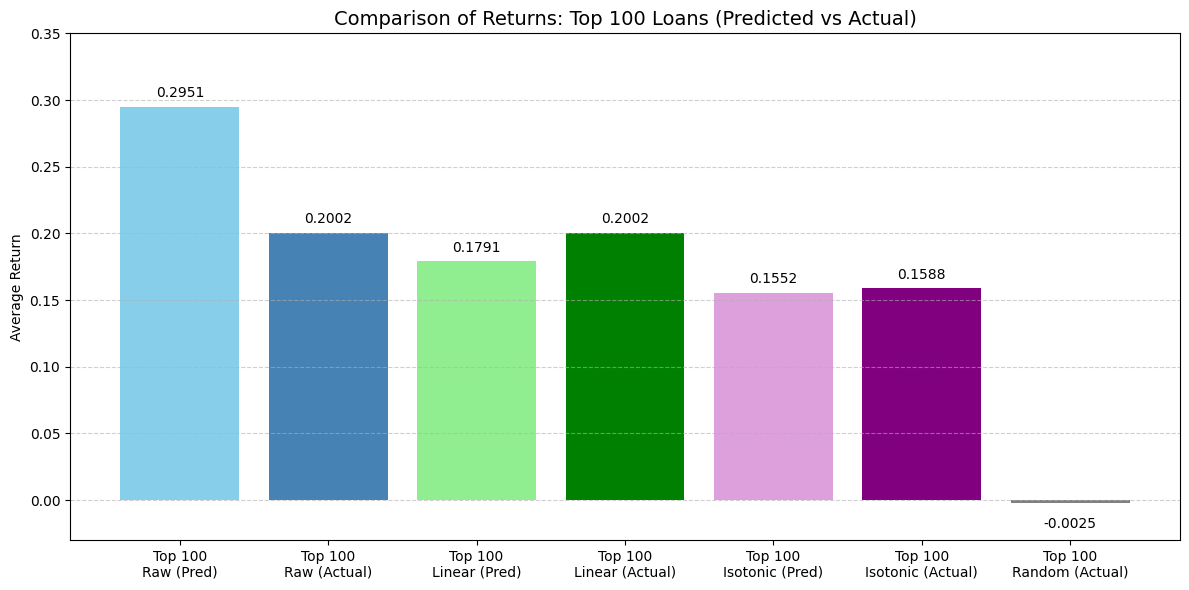

In [25]:
display(figure_6_2)

The ANN model proves highly effective in identifying high-return loans, as evidenced by all three top 100 selection strategies significantly outperforming random selection. The raw prediction has the highest predicted return, showing that even without calibration, the model can accurately target profitable loans. Applying linear scaling results in more conservative estimates still reflects strong performance, though slightly overestimating actual outcomes. Isotonic calibration further enhances accuracy by smoothing predictions and aligning them closely with real returns, offering a robust alternative with reduced risk of overfitting. In contrast, the average return from 100 randomly selected loans is negative, underscoring the ANN model’s strong ability to distinguish between high and low performing investments.

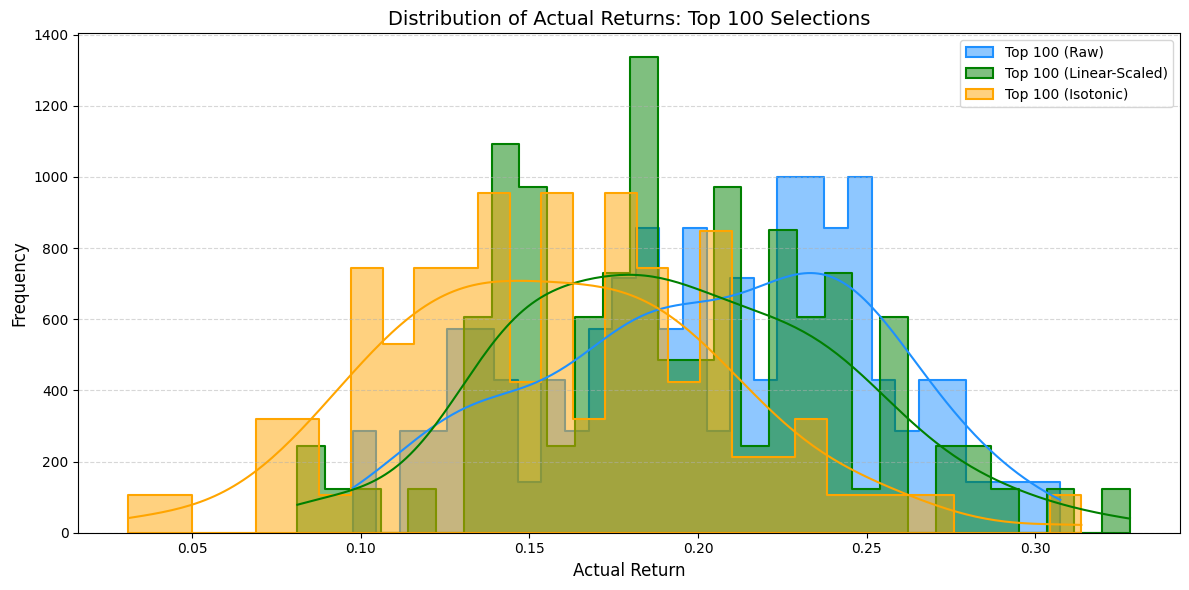

In [24]:
display(figure_6_3)

Shifted right compared to others, the raw return prediction has a wider spread, peaking at approximately 0.20-0.30. The distribution of linear-scaled returns are slightly left-shifted compared to raw, peaking at approximately 0.15-0.22, showing more moderate returns with less risk as linear scaling tones down overly optimistic predictions, leading to more consistent but lower return. Centered even further left, the isotonic calibration peaks at approximately 0.10-0.18, which closely reflects real-world outcomes. This suggests isotonic calibration adds robustness by reducing overfitting, while still confirming the model’s consistent ability to prioritize high-return investments. Linear scaling corrects global bias but doesn’t reshape the distribution, while isotonic calibration does the best job, and it tames extreme predictions.

The ANN model shows strong predictive performance, with a low MSE of 0.00303, suggesting it makes only small errors on average. Its MAE of 2.67% indicates that predicted returns typically deviate only slightly from actual values. With an R squared of 0.55, the model captures over half of the variation in loan returns – an encouraging result given the noise nature of financial data. Additionally, the model achieves 80.72% directional accuracy, highlighting its reliability in identifying whether a loan will yield a positive or negative return, making it highly useful for investment decision-making.

Before arriving at the final model, we experimented with several ANN configurations using different return definitions – from simple return to non-log annualized return. Through this process, we found that logarithmic annualized return provided the best fit for the dataset. We also explored various approaches to input feature selection, initially relying on correlation analysis, but ultimately determined that using the f_regression method to automatically select top features was most effective. This streamlined approach improved the model’s performance and contributed to achieving a solid R squared score.

### 6.2 Strategy 2 (Minismising Default) Results

<div style="line-height: 1.6;">
We built ? models for this strategy...

The final model was the ANN. This model was trained as described in section 5.2 and 15 trials were run, with results from the top 3 runs displayed below:
<br><br>

| Trial ID | Units | Validation AUC Score |
|:--------|:------|:---------------------|
| **03** 🔥 | **65** | **0.7842** |
| 13      | 95    | 0.7821               |
| 06      | 98    | 0.7818               |

<br>

The plot of the ROC curve below for the model from trial 3 also shows us an ideal curve, with the curve hugging the top left, suggesting good overall performance of the model across all thresholds.

</div>

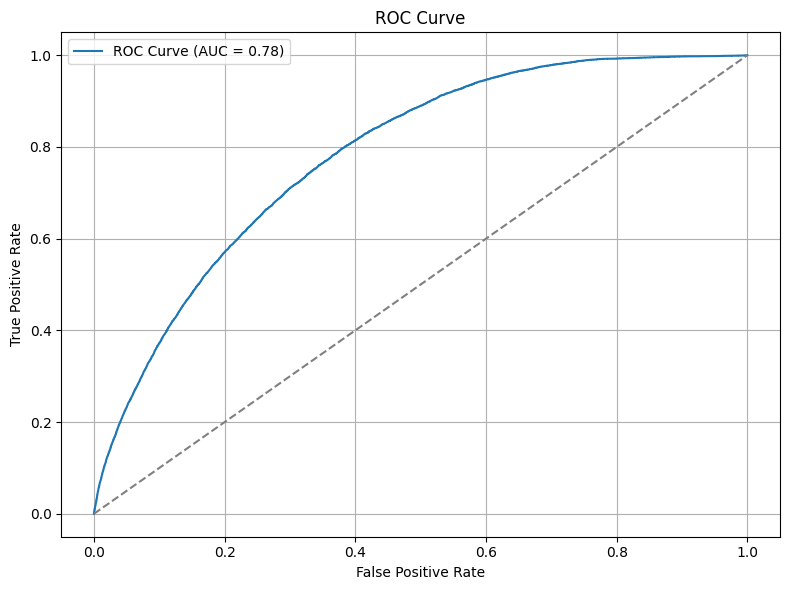

In [23]:
display(figure_6_4)

<div style="line-height: 1.6;">
We conduct threshold tuning in order to achieve a better recall score, uncovering 0.432 as the threshold at which 80% recall can be achieved. However, we round this up to 0.45 in order to avoid penalising the precision score extensively. Additionally, the model provides improved performance over the benchmark across all portfolio sizes, providing us with a good candidate model for portfolio construction. The results from the model from trial 3 with a threshold for 0.45 are as follows:
<br><br>

| Metric     | Value  |
|:-----------|:-------|
| Accuracy   | 0.668  |
| Precision  | 0.366  |
| Recall     | 0.776  |
| F1 Score   | 0.498  |
| AUC        | 0.782  |

<br>

🔹 Selected Low-Risk Loan Portfolio Summary (Threshold < 0.45)

| Metric                             | Value   |
|:-----------------------------------|:--------|
| Total Loans Selected               | 33,325  |
| Observed Default Rate (Portfolio)  | 19.67%  |


<br>

🔹 Top N Loan Portfolio Summary

| Top N Loans | Observed Default Rate | Average ROI |
|:-----------|:----------------------|:-----------|
| 300        | 10.00%                 | 12.45%     |
| 500        | 10.87%                 | 11.60%     |
| 1000       | 14.29%                 | 10.70%     |

</div>

In [ ]:
# Per Strategy
    # the results metrics for each model we decided on
    # comparison of the models


## 7. Conclusions

In [ ]:
## rickey

In [ ]:
# opinion on final strategy to use

## 8. Acknowledgements

Please see the below for details on individual responsibilities for this report.

| Names                 | Strategy | Model  |
|-----------------------|----------|--------|
| Kane and Owen         |  1  | Model 1 |
| Aadhira and Gabriella |  1  | Model 2 (ANN) |
| Rickey and Ariq       |  2  | Model 1 |
| Iman                  |  2  | Model 2 (ANN) |

<br>

Contributions to the EDA and experiments and results sections were made by all team members. Additionally, we employed the use of ChatGPT to aid in the following tasks:
- Generating starter code for creating plots and model building
- Debugging code
- Formatting the experiment results and references

## 9. References

<div style="line-height: 1.6;">
<p>Katal, A. and Singh, N. (2021) ‘Artificial neural network models: Applications and challenges’, in <em>EAI/Springer Innovations in Communication and Computing</em>. Cham: Springer International Publishing, pp. 235–257.</p>

<p>Zakaria, M., Al-Shebany, M. and Sarhan, S. (2014) ‘Artificial neural network: A brief overview’, <em>International Journal of Engineering Research and Applications</em>, 4(2), pp. 7–12.</p>

<p>Atsalakis, G.S. and Valavanis, K.P. (2009) ‘Forecasting stock market short-term trends using a neuro-fuzzy based methodology’, <em>Expert Systems with Applications</em>, 36(7), pp. 10696–10707.</p>

<p>Berg, T., Burg, V., Gombović, A. and Puri, M. (2020) <em>Machine learning for lending: Past, present, and future</em>. European Central Bank Working Paper Series, No. 2447.</p>

<p>Amazon Web Services (n.d.) <em>What is a neural network?</em> Available at: <a href="https://aws.amazon.com/what-is/neural-network/">https://aws.amazon.com/what-is/neural-network/</a> (Accessed: 14 April 2025).</p>
</div>

## 10. Appendices

<div style="line-height: 1.6;">
This section provides the code used to produce the aforementioned results. Each section of the report has a corresponding section for code within this appendix.
</div>

### 10.1 Library & Data Imports

In [ ]:
from pydantic import BaseModel, ConfigDict, Field
from typing import List
from PIL import Image as PILImage
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

from sklearn.preprocessing import StandardScaler
import keras_tuner as kt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
data, discrete_features, continuous_features = pd.read_pickle("lending_club_dataset.pickle")
# add column for custom return
data['raw_roi'] = (data['total_pymnt'] + data['recoveries'])/data['loan_amnt'] - 1
# add column for loan status target
data['loan_status_binary'] = data['loan_status'].apply(lambda x: 1 if x in ['Default', 'Charged Off'] else 0)

### 10.1.1 Import Images

In [12]:
from IPython.display import Image, display

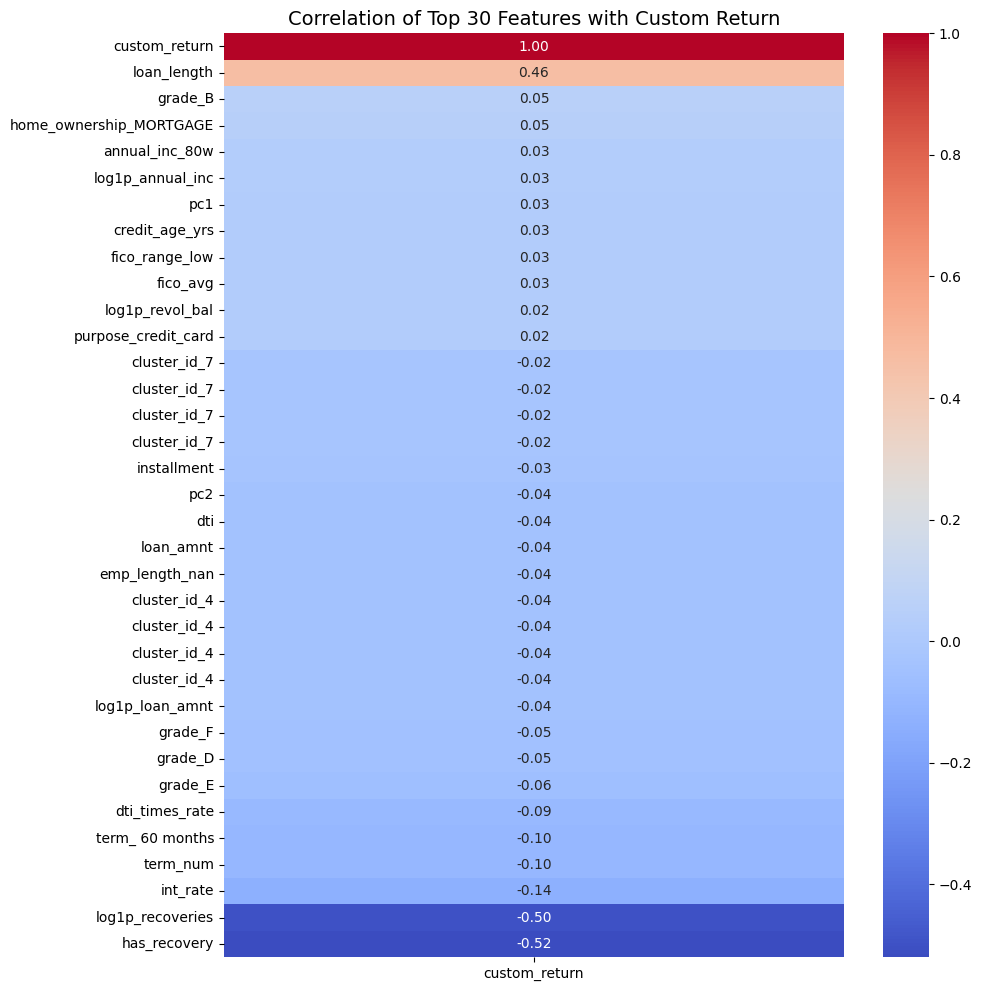

In [17]:
figure_3_1 = Image(filename='/content/sample_data/Pics/Top 30 Correlation.png', width=600, height=700)
display(figure_3_1)

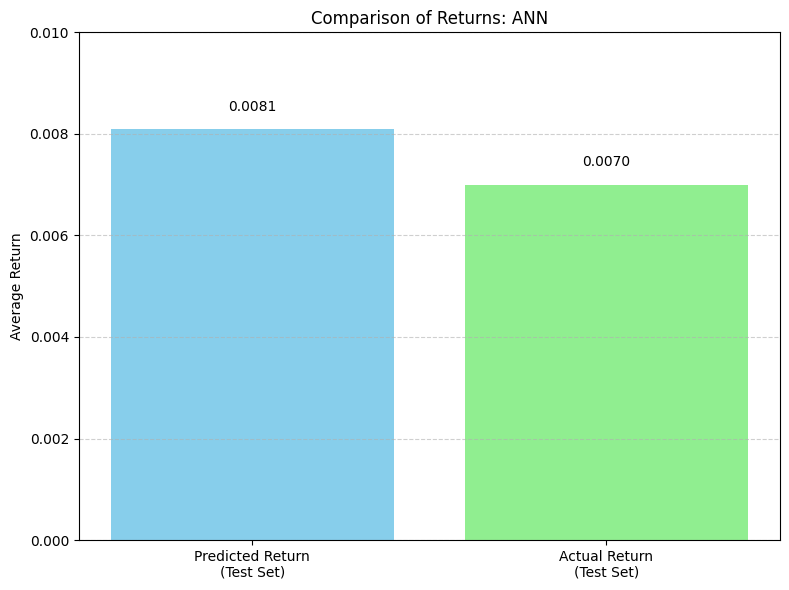

In [20]:
figure_6_1 = Image(filename='/content/sample_data/Pics/ANN.png', width=400, height=300)
display(figure_6_1)

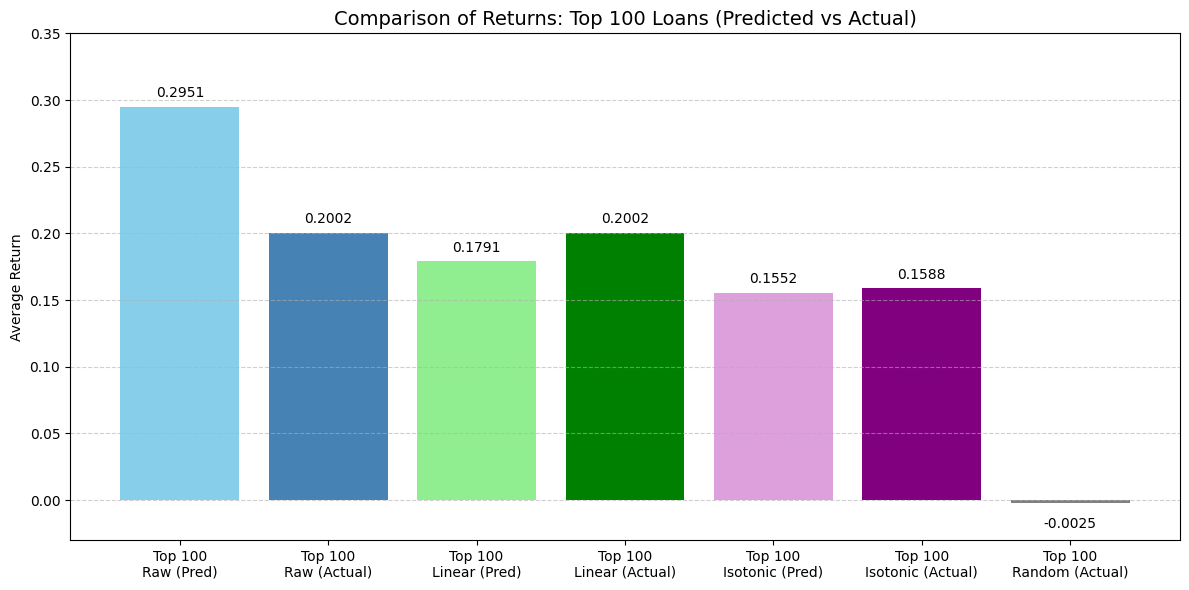

In [21]:
figure_6_2 = Image(filename='/content/sample_data/Pics/ANN Comparison.png', width=600, height=300)
display(figure_6_2)

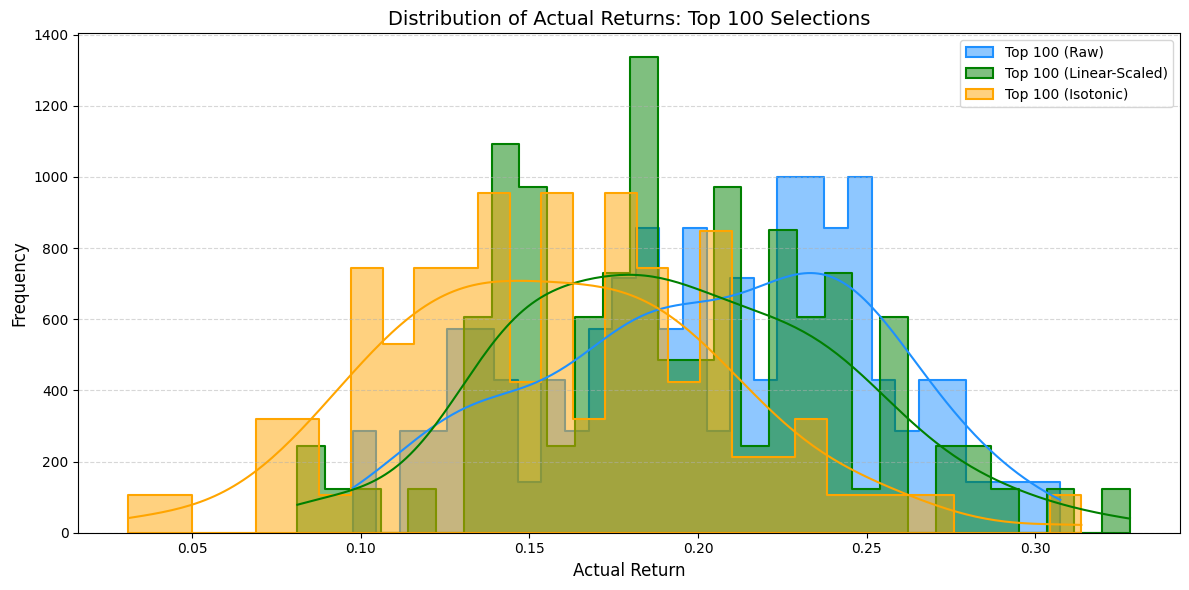

In [22]:
figure_6_3 = Image(filename='/content/sample_data/Pics/Return Distribution.png', width=600, height=300)
display(figure_6_3)

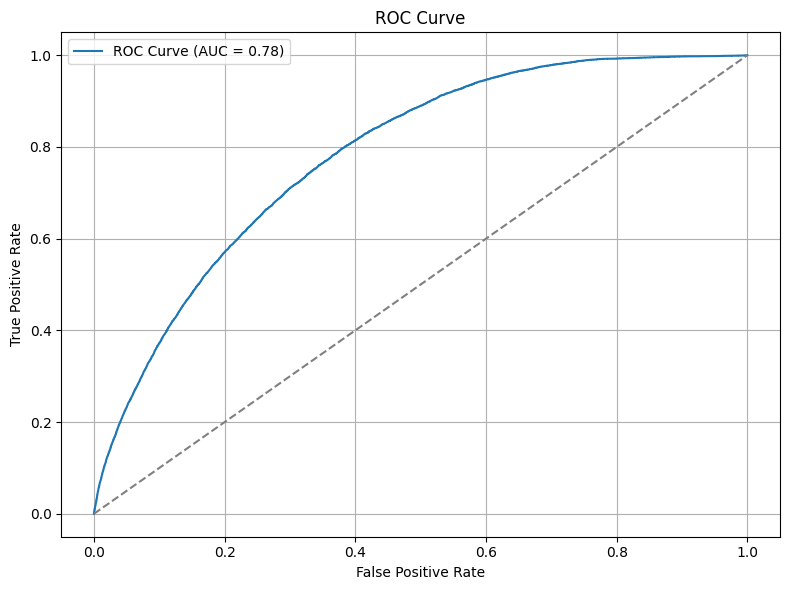

In [19]:
figure_6_4 = Image(filename='/content/sample_data/Pics/ROC.png', width=400, height=300)
display(figure_6_4)

### 10.2 Data Exploration Code

In [ ]:
# Set plot styles
sns.set_style("darkgrid")
sns.set_palette("colorblind")

In [ ]:
# get discrete and cont features (lists provided as part of pickle are incomplete)
disc = []
cont = []

for col in data.select_dtypes(include=['number', 'object', 'category']).columns:
    unique_vals = data[col].nunique(dropna=True)
    dtype = data[col].dtype

    if pd.api.types.is_numeric_dtype(dtype):
        if unique_vals <= 5:
            disc.append(col)
        else:
            cont.append(col)
    else:
        disc.append(col)

In [ ]:
## Grade-level df

# Percentage of loans by grade
perc_by_grade = (data.grade.value_counts() * 100 / len(data)).sort_index()

# Average interest rate and ret_INTa by grade
int_rate_by_grade = data.groupby("grade").apply(lambda x: np.mean(x.int_rate))
ret_by_grade_OPT = data.groupby("grade").apply(lambda x: np.mean(x.ret_INTa) * 100)

# Percentage of defaulted loans by grade
default_by_grade = data.groupby("grade").apply(lambda x: (x.loan_status.isin(["Charged Off", "Default"]).sum() * 100 / len(x)))

# Combine into one DataFrame
grades_df = pd.DataFrame(perc_by_grade)
grades_df.columns = ['% of Loans']
grades_df['int_rate'] = int_rate_by_grade
grades_df['ret_INTa'] = ret_by_grade_OPT
grades_df['default_%'] = default_by_grade


/var/folders/sq/dsmjj4353bg3dvwgbffm9lmh0000gn/T/ipykernel_90123/2717647831.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  int_rate_by_grade = data.groupby("grade").apply(lambda x: np.mean(x.int_rate))
/var/folders/sq/dsmjj4353bg3dvwgbffm9lmh0000gn/T/ipykernel_90123/2717647831.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret_by_grade_OPT = data.groupby("grade").apply(lambda x: np.mean(x.ret_INTa

In [ ]:
## Home ownership-level df

# Percentage of loans by grade
perc_by_own = (data.home_ownership.value_counts() * 100 / len(data)).sort_index()

# Average interest rate and ret_INTa by grade
int_rate_by_own = data.groupby("home_ownership").apply(lambda x: np.mean(x.int_rate))
ret_by_grade_own = data.groupby("home_ownership").apply(lambda x: np.mean(x.ret_INTa) * 100)

# Percentage of defaulted loans by grade
default_by_own = data.groupby("home_ownership").apply(lambda x: (x.loan_status.isin(["Charged Off", "Default"]).sum() * 100 / len(x)))

# Combine into one DataFrame
ownership_df = pd.DataFrame(perc_by_own)
ownership_df.columns = ['% of Loans']
ownership_df['int_rate'] = int_rate_by_own
ownership_df['ret_INTa'] = ret_by_grade_own
ownership_df['default_%'] = default_by_own

/var/folders/sq/dsmjj4353bg3dvwgbffm9lmh0000gn/T/ipykernel_90123/731480348.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  int_rate_by_own = data.groupby("home_ownership").apply(lambda x: np.mean(x.int_rate))
/var/folders/sq/dsmjj4353bg3dvwgbffm9lmh0000gn/T/ipykernel_90123/731480348.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret_by_grade_own = data.groupby("home_ownership").apply(lambda x: np.m

In [ ]:
class DataProfile(BaseModel):
    df: pd.DataFrame
    continuous_features: List[str] = Field(default=cont, description="list of continuous features")
    discrete_features: List[str] = Field(default=disc, description="list of discrete features")

    model_config = ConfigDict(arbitrary_types_allowed=True)

    def plot_distribution(self, feature: str, figsize=(15, 5), subplot=False):
        if not subplot:
            plt.figure(figsize=figsize)
        plt.title(f"Distribution of {feature}")

        if feature in self.continuous_features:
            sns.kdeplot(self.df[feature])
            plt.ylabel("Density")
        else:
            ax = sns.histplot(self.df[feature].dropna(), kde=True, bins=30)
            ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=9)
            plt.ylabel("Frequency")

        if not subplot:
            plt.tight_layout()
            plt.show()

    def plot_comparative_dist(self, feature1: str, feature2: str, plot_type: str = "kde", figsize=(15, 5), subplot=False):
        if plot_type == "kde":
            if any([feature in self.discrete_features for feature in [feature1, feature2]]):
                return "TypeError: KDE cannot be created using discrete features."
            if not subplot:
                plt.figure(figsize=figsize)
            sns.kdeplot(self.df[feature1].dropna(), label=feature1, fill=True, alpha=0.4)
            sns.kdeplot(self.df[feature2].dropna(), label=feature2, alpha=0.4)
            plt.title(f'KDE Comparison: {feature1} vs {feature2}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.legend()

        if plot_type == "boxplot":
            if not subplot:
                plt.figure(figsize=figsize)
            sns.boxplot(data=self.df[[feature1, feature2]])
            plt.title(f'Boxplot Comparison: {feature1} vs {feature2}')

        if not subplot:
            plt.tight_layout()
            plt.show()

    def plot_relationship_continuous(self, x: str, y: str, figsize=(15, 5), subplot=False):
        if not subplot:
            plt.figure(figsize=figsize)
        if pd.api.types.is_numeric_dtype(self.df[x]) and pd.api.types.is_numeric_dtype(self.df[y]):
            sns.scatterplot(data=self.df, x=x, y=y, alpha=0.5)
            sns.regplot(data=self.df, x=x, y=y, scatter=False, ci=None)
            plt.title(f'Scatterplot with Trendline: {x} vs {y}')
        else:
            print("TypeError: Invalid data types. Please check that both features are continuous.")
        plt.xticks(rotation=45)
        if not subplot:
            plt.tight_layout()
            plt.show()

    def plot_relationship_discrete(self, x: str, y: str, figsize=(15, 5), subplot=False):
        if not subplot:
            plt.figure(figsize=figsize)
        sns.countplot(data=self.df, x=x, hue=y)
        plt.title(f'Countplot: {x} vs {y}')
        plt.xticks(rotation=45)
        if not subplot:
            plt.tight_layout()
            plt.show()

    def plot_line_discrete_continuous(self, x_discrete, y_continuous, aggfunc='mean', figsize=(15, 5), subplot=False):
        grouped = self.df.groupby(x_discrete)[y_continuous].agg(aggfunc).reset_index()
        if pd.api.types.is_object_dtype(self.df[x_discrete]) or pd.api.types.is_categorical_dtype(self.df[x_discrete]):
            grouped = grouped.sort_values(by=x_discrete)
        if not subplot:
            plt.figure(figsize=figsize)
        sns.lineplot(data=grouped, x=x_discrete, y=y_continuous, marker='o')
        plt.title(f'{aggfunc.title()} {y_continuous} by {x_discrete}')
        plt.xticks(rotation=45)
        if not subplot:
            plt.tight_layout()
            plt.show()

    def bar_plot_by_index(self, y: str, figsize=(15, 5), title="", subplot=False):
        if not subplot:
            plt.figure(figsize=figsize)
        sns.barplot(x=self.df.index, y=self.df[y])
        plt.title(title)
        plt.xticks(rotation=45)
        if not subplot:
            plt.tight_layout()
            plt.show()

    def plot_heatmap(self, figsize=(15, 5), subplot=False):
        if not subplot:
            plt.figure(figsize=figsize)
        plt.title("Correlation Heatmap")
        plt.xticks(rotation=45)
        sns.heatmap(self.df[self.continuous_features].corr(), annot=False)
        if not subplot:
            plt.tight_layout()
            plt.show()

# create instance of class
eda = DataProfile(df=data)
eda_grade = DataProfile(df=grades_df)
eda_own = DataProfile(df=ownership_df)

In [ ]:
def save_plot_to_memory():
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image = Image.open(buf)
    # buf.close()
    return image

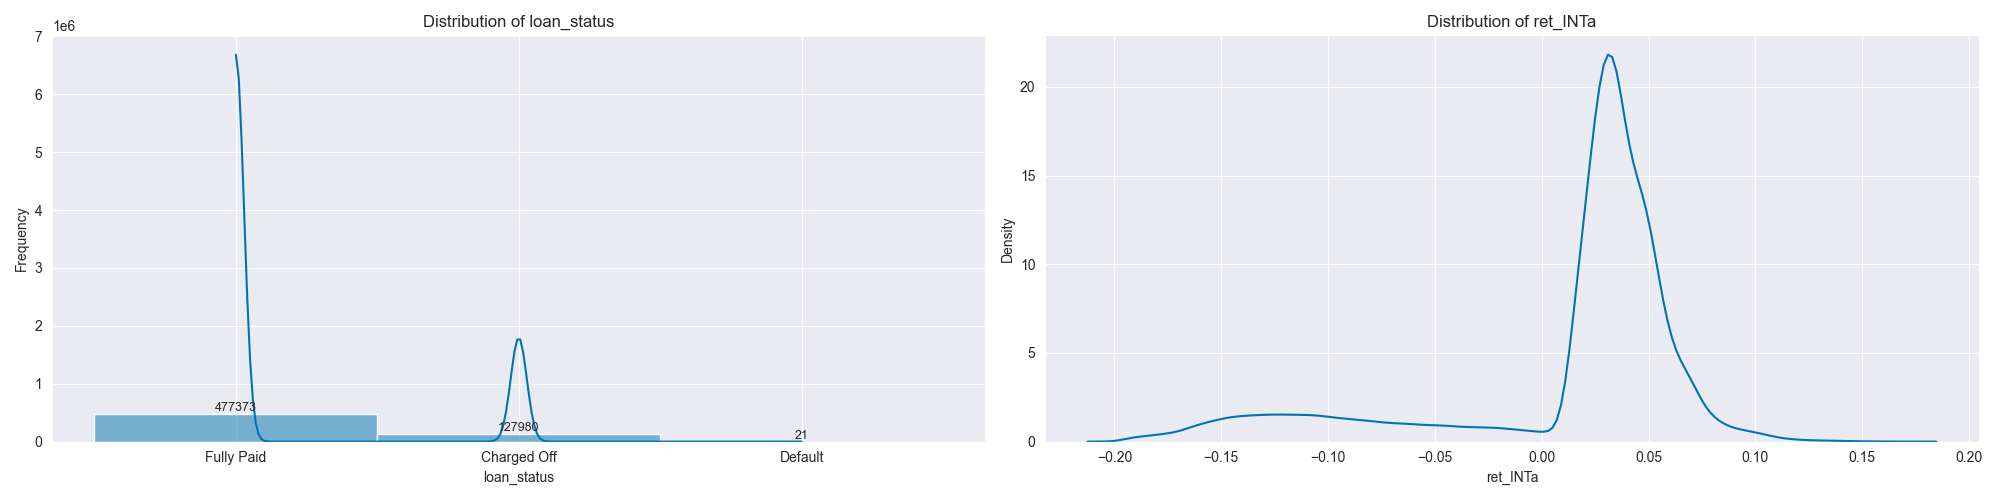

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.sca(axs[0])
eda.plot_distribution("loan_status", subplot=True)
plt.sca(axs[1])
eda.plot_distribution("ret_INTa", subplot=True)
plt.tight_layout()
# plt.show()

# save figure in memory
figure_1_1 = save_plot_to_memory()
display(figure_1_1)


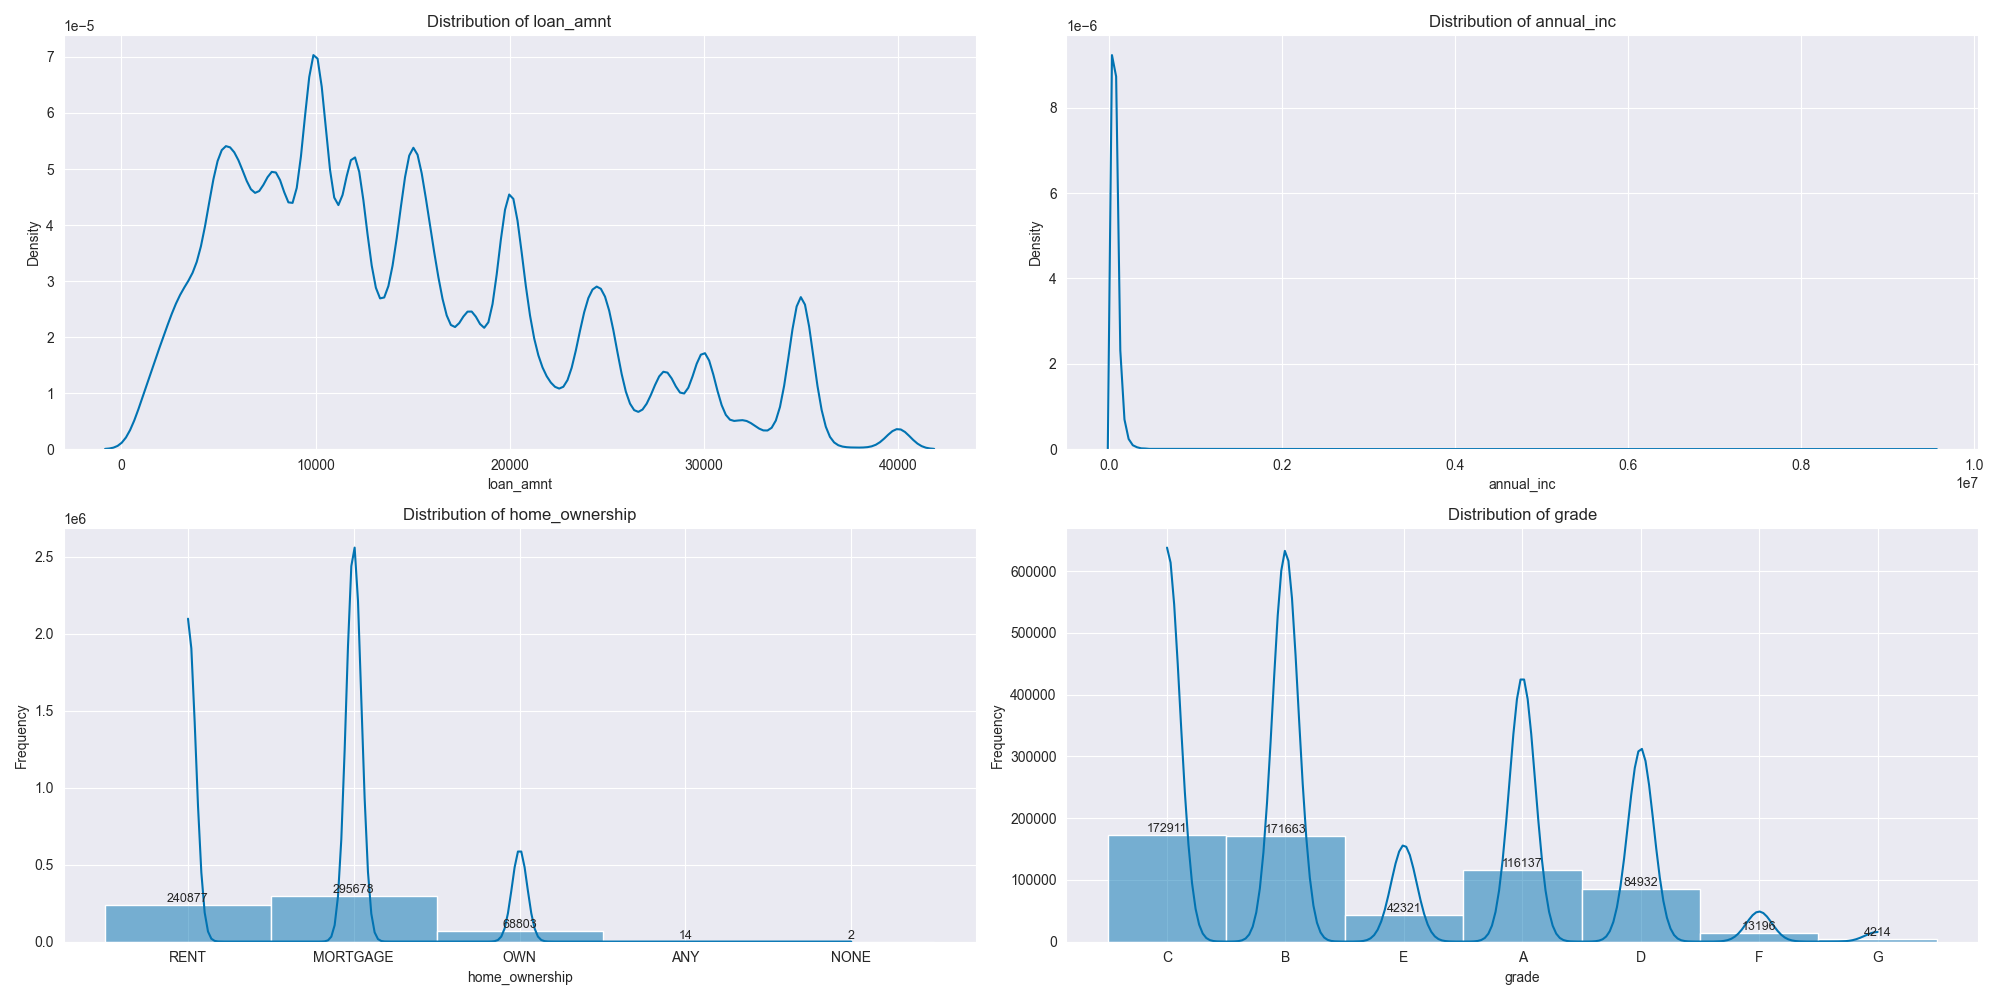

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.sca(axs[0, 0])
eda.plot_distribution("loan_amnt", subplot=True)
plt.sca(axs[0, 1])
eda.plot_distribution("annual_inc", subplot=True)
plt.sca(axs[1, 0])
eda.plot_distribution("home_ownership", subplot=True)
plt.sca(axs[1, 1])
eda.plot_distribution("grade", subplot=True)
plt.tight_layout()
# plt.show()

# save figure in memory
figure_1_2 = save_plot_to_memory()
display(figure_1_2)

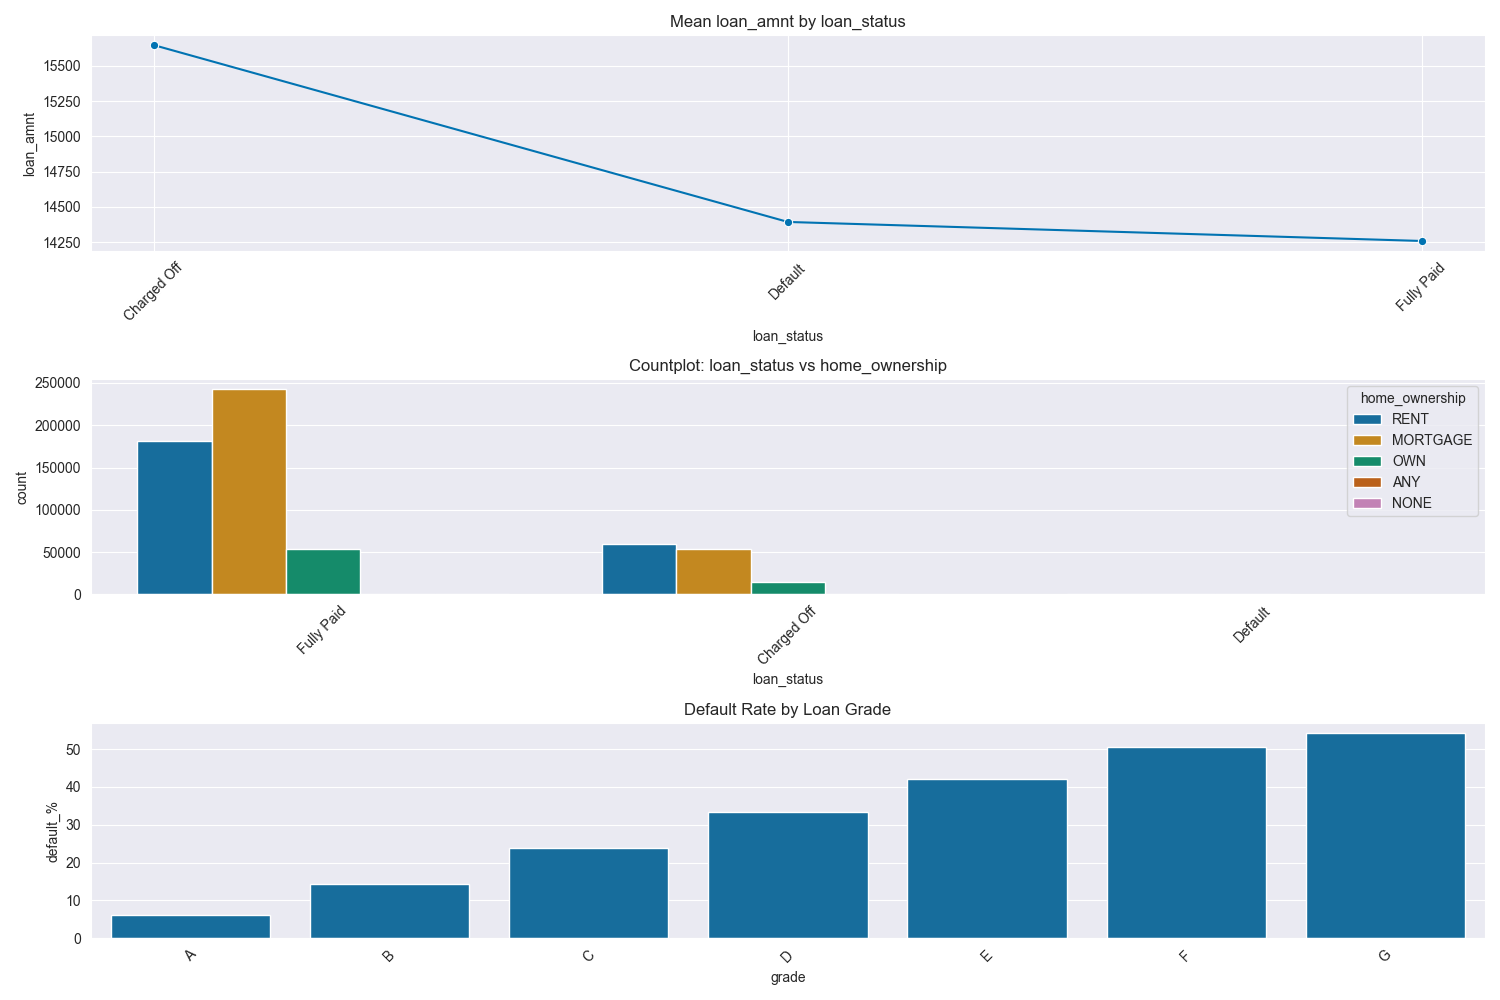

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
plt.sca(axs[0])
eda.plot_line_discrete_continuous(x_discrete="loan_status", y_continuous="loan_amnt", subplot=True)
plt.sca(axs[1])
eda.plot_relationship_discrete("loan_status", "home_ownership", subplot=True)
plt.sca(axs[2])
eda_grade.bar_plot_by_index("default_%", title="Default Rate by Loan Grade", subplot=True)
plt.tight_layout()
# plt.show()

# save figure in memory
figure_1_3 = save_plot_to_memory()
display(figure_1_3)

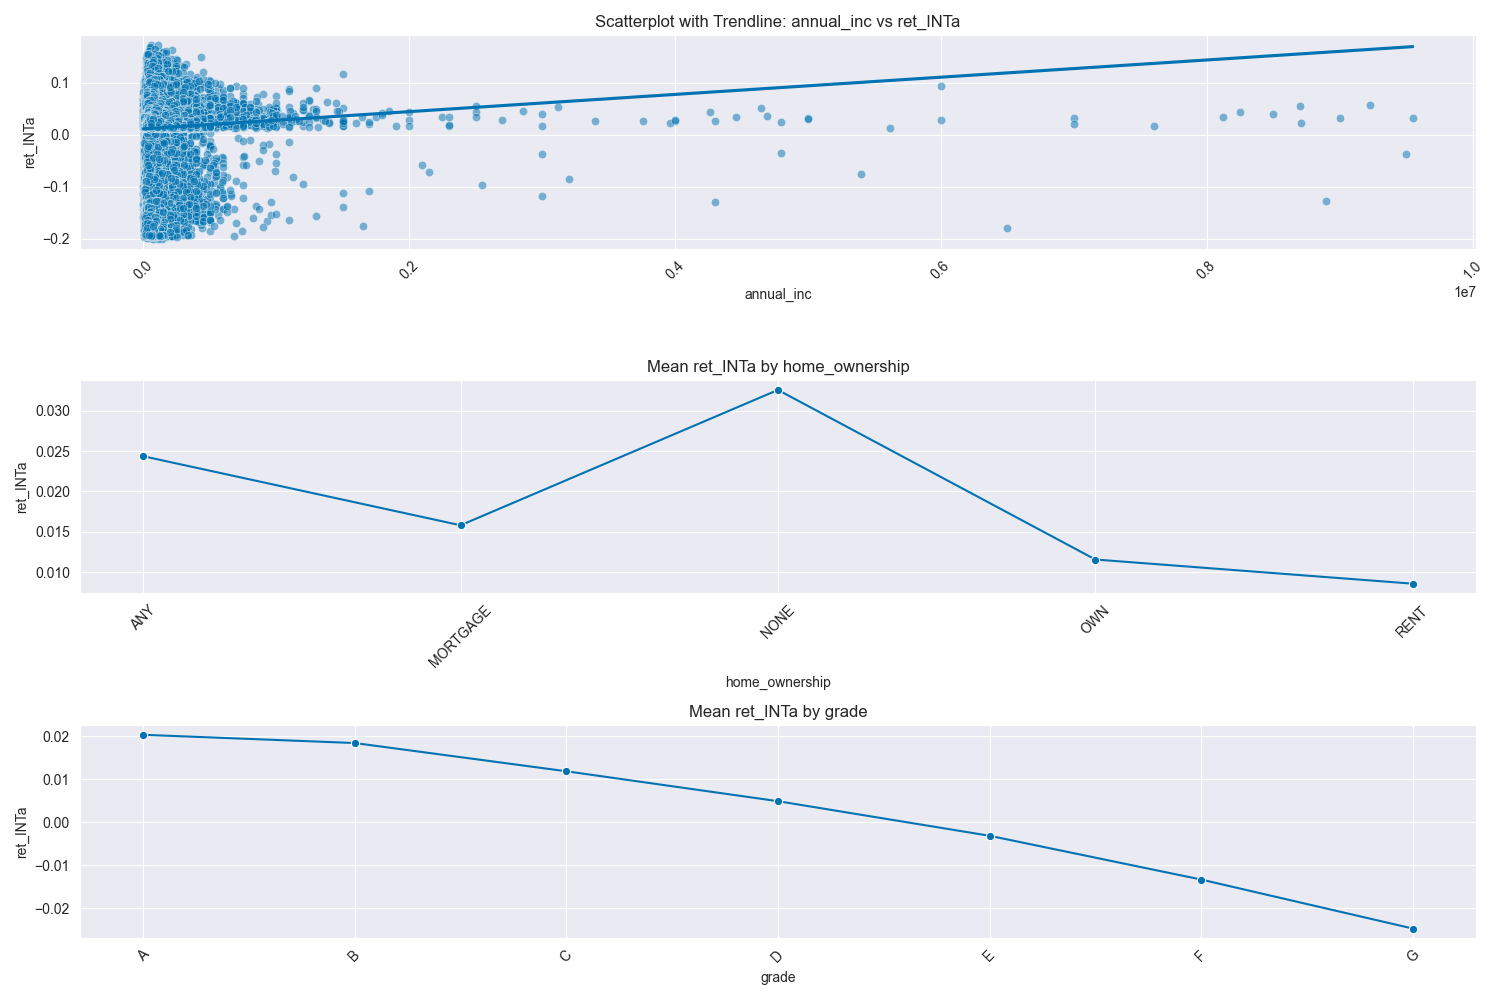

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
plt.sca(axs[0])
eda.plot_relationship_continuous(x="annual_inc", y="ret_INTa", subplot=True)
plt.sca(axs[1])
eda.plot_line_discrete_continuous(x_discrete="home_ownership", y_continuous="ret_INTa", subplot=True)
plt.sca(axs[2])
eda.plot_line_discrete_continuous(x_discrete="grade", y_continuous="ret_INTa", subplot=True)
plt.tight_layout()
# plt.show()

# save figure in memory
figure_1_4 = save_plot_to_memory()
display(figure_1_4)

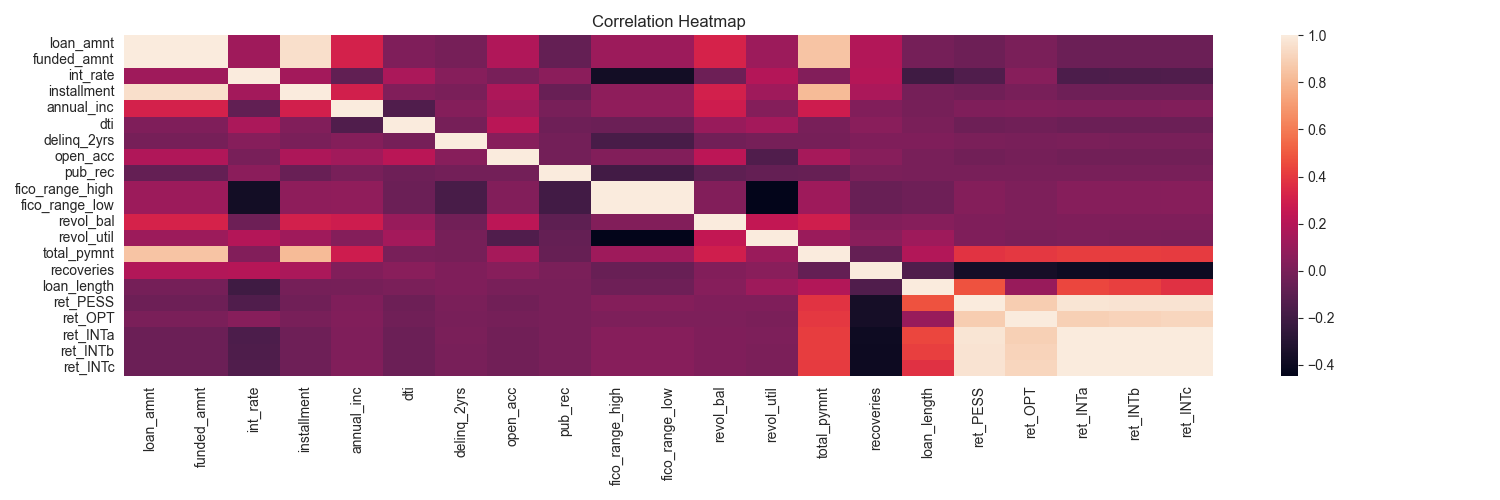

In [ ]:
plt.figure(figsize=(15, 5))
eda.plot_heatmap(subplot=True)
plt.tight_layout()

# save figure in memory
figure_1_5 = save_plot_to_memory()
display(figure_1_5)

### 10.3 Benchmark Code

In [ ]:
def random_portfolio_return(data, portfolio_size, return_col='ret_OPT', n_trials=1, random_state=None):
    """
    Randomly sample portfolios and calculate mean return.
    Args:
        data: DataFrame with loan data.
        portfolio_size: Number of loans to sample.
        return_col: Column name for return.
        n_trials: Number of random portfolios to average over.
        random_state: Seed for reproducibility.
    Returns:
        Mean and std of portfolio returns across trials.
    """
    np.random.seed(random_state)
    returns = []
    for _ in range(n_trials):
        sample = data.sample(n=portfolio_size, replace=False)
        returns.append(sample[return_col].mean())
    return np.mean(returns), np.std(returns)

results = []
for size in [1000, 500, 300]:
    mean_ret, std_ret = random_portfolio_return(data, size, return_col='raw_roi', n_trials=100, random_state=42)
    results.append((size, mean_ret, std_ret))

# Create markdown table
md_table = "| Portfolio Size | Mean Return | Std Dev |\n"
md_table += "|:--------------:|:-----------:|:-------:|\n"
for size, mean_ret, std_ret in results:
    md_table += f"| {size} | {mean_ret*100:.2f}% | {std_ret:.4f} |\n"

print(md_table)

| Portfolio Size | Mean Return | Std Dev |
|:--------------:|:-----------:|:-------:|
| 1000 | 2.77% | 0.0089 |
| 500 | 2.57% | 0.0114 |
| 300 | 2.67% | 0.0151 |



### 10.4 Investment Strategy 1, Model 1 Code

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add custom_return back to X for correlation
corr_df = X.copy()
corr_df['custom_return'] = data['custom_return']

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Extract correlation of custom_return with top features
correlation_with_target = correlation_matrix[['custom_return']].sort_values(by='custom_return', ascending=False)

# Plot
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation of Top 30 Features with Custom Return", fontsize=14)
plt.show()

In [ ]:
###

### 10.5

### 10.6

### 10.7 Investment Strategy 2, Model 2 (ANN)

In [ ]:
#### DATA PREPROCESSING
#### ---------------------------------
df = data.copy()

# feature engineer for earliest_cr_line and issue_d
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%Y-%m')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m')
df['credit_history_months'] = ((df['issue_d'] - df['earliest_cr_line']) / pd.Timedelta(days=30)).astype(int)

# drop leaky / duplicate columns
df.drop(columns=['loan_status', 'id', 'issue_d', 'last_pymnt_d', 'earliest_cr_line', 'term', 'funded_amnt', 'fico_range_low', 'ret_PESS', 'ret_OPT',
    'ret_INTa', 'ret_INTb', 'ret_INTc', 'total_pymnt', 'recoveries'], inplace=True)

# get lists of categorical and numerical columns
target_col = 'loan_status_binary'
cat_cols = ['grade', 'term_num', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
num_cols = [col for col in df.columns if col not in cat_cols + [target_col]]

# create dummy variables for categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# split data into features and target
x_df = df.drop(columns=[target_col])
y = df[target_col]

# split data into train and test sets
default_seed = 49  # for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.1, random_state=default_seed)

# separate out return column
x_train = x_train.drop(columns=['raw_roi'])
x_test_return = x_test['raw_roi']
x_test = x_test.drop(columns=['raw_roi'])

# scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#### MODEL TRAINING
#### ---------------------------------

# compute class weights
y_train_flat = np.array(y_train).flatten()
# Get all unique labels in y_train
unique_classes = np.unique(y_train_flat)
# Compute class weights correctly
class_weights = dict(zip(
    unique_classes,
    compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train_flat)
))

# get number of features
n_features, n_outputs = x_train.shape[1], 1

# function for building model (with hyperparameter tuning)
def build_model(hp):
    model = Sequential()

    # hidden layer tuning
    model.add(Dense(hp.Int('units', min_value=1, max_value=100), activation='relu', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.AUC()])
    return model

# Setup EarlyStopping and ReduceLROnPlateau
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,          # Reduce LR by this factor
    patience=2,
    min_lr=1e-6
)

# Use RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_auc',
    max_trials=15,  # number of different hyperparam combinations to try
    executions_per_trial=1,
    directory='ann-default',
    project_name='final-model'
)

# Search over the data
tuner.search(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, class_weight=class_weights, callbacks=[early_stopping, reduce_lr])

# Print the best model configuration
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units: {best_hps.get('units')}")

# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate on test data or make predictions
loss, accuracy, precision, recall, auc = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")

#### PLOT TRAINING HISTORY
#### ---------------------------------

history = best_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#### THRESHOLD SELECTION
#### ---------------------------------

# Step 1: Get predicted probabilities (not class labels)
y_probs = best_model.predict(x_test).flatten()

# Step 2: Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Align lengths — trim first element off precision/recall
precisions = precisions[1:]
recalls = recalls[1:]

# Step 3: Set your recall constraint
recall_threshold = 0.80
# precision_threshold = 0.40

# Step 4: Filter thresholds
valid = (recalls >= recall_threshold) # & (precisions >= precision_threshold)

# Step 5: Among those, find the threshold with highest precision
if valid.any():
    best_idx = np.argmax(precisions[valid])
    best_threshold = thresholds[valid][best_idx]
    best_precision = precisions[valid][best_idx]
    best_recall = recalls[valid][best_idx]

    print(f"Best threshold for recall ≥ {recall_threshold*100:.0f}%:")
    print(f"  Threshold: {best_threshold:.3f}")
    print(f"  Precision: {best_precision:.3f}")
    print(f"  Recall:    {best_recall:.3f}")
else:
    print(f"No threshold found where recall ≥ {recall_threshold*100:.0f}%")


#### PRECISION-RECALL CURVE
# Predict probabilities
y_probs = best_model.predict(x_test).flatten()

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

# Optional: Mark a chosen threshold
# (Assumes you've already found best_threshold using previous code)
chosen_threshold = 0.45  # replace with your selected value
# Find closest threshold index
thresholds = thresholds  # already returned by precision_recall_curve
recalls = recalls[1:]    # align lengths
precisions = precisions[1:]
idx = np.argmin(np.abs(thresholds - chosen_threshold))

plt.scatter(recalls[idx], precisions[idx], color='red', label=f'Threshold = {chosen_threshold:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

#### ROC CURVE
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### FINAL MODEL EVALUATION
threshold = 0.45
y_pred = (y_probs >= threshold).astype(int)

print(f"Threshold: {threshold:.2f}")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"AUC      : {auc_score:.3f}")

#### FEATURE IMPORTANCE
#### ---------------------------------
x_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high', 'revol_bal',
       'revol_util', 'loan_length', 'credit_history_months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'term_num_60', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']

# Define a wrapper (assuming you have a build_model function)
model_sklearn = KerasClassifier(build_fn=build_model_wrapper, epochs=10, verbose=0)
model_sklearn.fit(x_train, y_train)

# Compute permutation importances (on a small subset to speed up)
result = permutation_importance(model_sklearn, x_test[:1000], y_test[:1000], n_repeats=5, random_state=42)

# Show top importances
importances = pd.Series(result.importances_mean, index=x_columns)  # set your feature_names list
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Top Feature Importances', figsize=(8, 6))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
#### PORTFOLIO CONSTRUCTION
#### ---------------------------------

# Sort by predicted probability of default (ascending)
portfolio = x_test.copy()
portfolio = pd.DataFrame(portfolio, columns=x_columns)
y_probs = best_model.predict(x_test).flatten()
portfolio['prob_default'] = y_probs# [:, 0]
portfolio['actual_default'] = y_test
portfolio['raw_roi'] = x_test_return

# Define cutoff for low-risk
portfolio_selected = portfolio[portfolio['prob_default'] < 0.45]

# Portfolio summary
print("Selected Low-Risk Loan Portfolio Summary (Threshold < 0.45):")
print(f"Total loans selected: {len(portfolio_selected)}")
print(f"Observed default rate in selected portfolio: {portfolio_selected['actual_default'].mean() * 100:.2f}%")

# Option 2: Top N safest loans
for n in [300, 500, 1000]:
    portfolio_top_n = portfolio.sort_values(by='prob_default').head(n)
    print("Top N Loan Portfolio Summary:")
    print(f"Top {n} loans selected")
    print(f"Observed default rate: {portfolio_top_n['actual_default'].mean() * 100:.2f}%")
    print(f"Average ROI: {portfolio_top_n['raw_roi'].mean() * 100:.2f}%")

plt.figure(figsize=(8,5))
sns.histplot(portfolio['prob_default'], bins=30, kde=True, color='seagreen')
plt.axvline(0.4, color='red', linestyle='--', label='Cutoff: 0.4')
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Loan Count")
plt.legend()
plt.tight_layout()
plt.show()


### 10.8